In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Downloads/weather_nominal.csv')

In [3]:
df

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


$Entropy$ $:=$ measure of amount of uncertainity

\begin{align}
H(s) = \sum_{x\epsilon X}^{} p(x)log_{2}\frac{1}{p(x)}
\end{align}

$Information Gain =$ Measure of relative change in entropy with respect to independent variable

\begin{align}
IG(S,A) = H(s) - \sum_{i=0}^{n} P(x)*H(x)
\end{align}

We are interested in playing golf

Hence play golf is considered as class attribute

Calculate entropy w.r.t class attribute

In [4]:
playing = df[df['Play golf'] == 'Yes']

In [5]:
playing

,Outlook,Temperature,Humidity,Windy,Play golf
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
6,Overcast,Cool,Normal,True,Yes
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes
10,Rainy,Mild,Normal,True,Yes
11,Overcast,Mild,High,True,Yes
12,Overcast,Hot,Normal,False,Yes


In [6]:
not_playing = df[df['Play golf'] ==  'No']

In [7]:
not_playing

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
5,Sunny,Cool,Normal,True,No
7,Rainy,Mild,High,False,No
13,Sunny,Mild,High,True,No


In [8]:
len(playing)

9

In [9]:
len(not_playing)

5

\begin{align}
Entropy(S) = -\frac{9}{14}log_{2}\frac{9}{14} -\frac{5}{14}log_{2}\frac{5}{14} = 0.940
\end{align}

$Note$: Entropy is 0 if all members belong to the same class, and 1 when half of them belong to one class and other half belong to other class

###### Now the next step is to choose the attribute that gives us highest possible Information Gain which we’ll choose as the root node.

In [10]:
windy = df[df['Windy']]

In [11]:
windy

,Outlook,Temperature,Humidity,Windy,Play golf
1,Rainy,Hot,High,True,No
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
10,Rainy,Mild,Normal,True,Yes
11,Overcast,Mild,High,True,Yes
13,Sunny,Mild,High,True,No


In [12]:
not_windy = df[~df['Windy']]

In [13]:
not_windy

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes
12,Overcast,Hot,Normal,False,Yes


In [14]:
windy_playing = windy[windy['Play golf'] == 'Yes']

In [15]:
windy_playing

,Outlook,Temperature,Humidity,Windy,Play golf
6,Overcast,Cool,Normal,True,Yes
10,Rainy,Mild,Normal,True,Yes
11,Overcast,Mild,High,True,Yes


In [16]:
Windy_not_playing = windy[windy['Play golf'] == 'No']

In [17]:
Windy_not_playing

,Outlook,Temperature,Humidity,Windy,Play golf
1,Rainy,Hot,High,True,No
5,Sunny,Cool,Normal,True,No
13,Sunny,Mild,High,True,No


In [18]:
print('Windy days ', len(windy))
print('Windy days playing ', len(windy_playing))
print('Windy days not playing', len(Windy_not_playing))

Windy days  6
Windy days playing  3
Windy days not playing 3


In [19]:
not_windy_playing = not_windy[not_windy['Play golf'] == 'Yes']
not_windy_not_playing = not_windy[not_windy['Play golf'] == 'No']

In [20]:
print('No Windy days', len(not_windy))
print('No Windy days playing', len(not_windy_playing))
print('No Windy days not playing', len(not_windy_not_playing))

No Windy days 8
No Windy days playing 6
No Windy days not playing 2


\begin{align}
Entropy(S_{windy}) = -(\frac{3}{6})log_{2}(\frac{3}{6}) -(\frac{3}{6})log_{2}(\frac{3}{6}) = 1
\end{align}



\begin{align}
Entropy(S_{not windy}) = -(\frac{6}{8})log_{2}(\frac{6}{8}) -(\frac{2}{8})log_{2}(\frac{2}{8}) = 0.811
\end{align}

\begin{align}
Probability(S_{windy}) = 6/14
\end{align}

\begin{align}
Probability(S_{not windy}) = 8/14
\end{align}

\begin{align}
IG(S, Windy) = H(S) - P(S_{windy})* H(S_{windy}) - P(S_{not windy})* H(S_{not windy})
\end{align}


\begin{align}
= 0.94 - (6/14)*(1) - (8/14)*(0.811)
\end{align} 

\begin{align}
= 0.048
\end{align} 

With respect to Temperature

We have three attributes, 

$Hot$, $Cold$ and $Mild$

Num_of $hot$  = 4     
($Yes$ = 2, $No$ = 2)

Num_of $cold$ = 4     
($Yes$ = 3, $No$ = 1)

Num_of $mild$ = 6         
($Yes$ = 4, $No$ = 2)

\begin{align}
IG(S,Temperature) = 0.940 - (\frac{4}{14} * (-\frac{2}{2} log_{2}\frac{2}{2}-\frac{2}{2} log_{2}\frac{2}{2})) - (\frac{4}{14} * (-\frac{3}{4} log_{2}\frac{3}{4}-\frac{1}{4} log_{2}\frac{1}{4})) - (\frac{6}{14} * (-\frac{4}{6} log_{2}\frac{4}{6}-\frac{2}{6} log_{2}\frac{2}{6}))
\end{align}


\begin{align}
= 0.94-(\frac{4}{14}* (1) + \frac{4}{14}* (0.811) + \frac{6}{14}* ()0.916)
\end{align}


\begin{align}
= 0.029
\end{align}

Similarly we get following information gain

$IG(S, Outlook) = 0.246$

$IG(S, Temperature) = 0.029$

$IG(S, Huidity) = 0.151$

$IG(S, Wind) = 0.048$

In [36]:
outlook = df[df['Outlook'] != "Overcast"]

In [37]:
outlook

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes
10,Rainy,Mild,Normal,True,Yes
13,Sunny,Mild,High,True,No


In [38]:
sunny = outlook[outlook['Outlook'] == 'Sunny']

In [39]:
sunny

,Outlook,Temperature,Humidity,Windy,Play golf
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
9,Sunny,Mild,Normal,False,Yes
13,Sunny,Mild,High,True,No


In [40]:
rainy = outlook[outlook['Outlook'] == 'Rainy']

In [41]:
rainy

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
10,Rainy,Mild,Normal,True,Yes


In [42]:
sunny_data = sunny.drop('Outlook', axis = 'columns')

In [43]:
rainy_data = rainy.drop('Outlook', axis = 'columns')

In [44]:
sunny_data

,Temperature,Humidity,Windy,Play golf
3,Mild,High,False,Yes
4,Cool,Normal,False,Yes
5,Cool,Normal,True,No
9,Mild,Normal,False,Yes
13,Mild,High,True,No


In [45]:
rainy_data

,Temperature,Humidity,Windy,Play golf
0,Hot,High,False,No
1,Hot,High,True,No
7,Mild,High,False,No
8,Cool,Normal,False,Yes
10,Mild,Normal,True,Yes


\begin{align}
Entropy(S_{Rainy}) = -(\frac{3}{5})log_{2}(\frac{3}{5}) -(\frac{2}{5})log_{2}(\frac{2}{5}) = 0.97
\end{align}


\begin{align}
IG(S_{Rainy},Temperature) = 0.97 - (\frac{2}{5} * (-\frac{0}{2} log_{2}\frac{0}{2}-\frac{2}{2} log_{2}\frac{2}{2})) - (\frac{2}{5} * (-\frac{1}{2} log_{2}\frac{1}{2}-\frac{1}{2} log_{2}\frac{1}{2})) - (\frac{1}{5} * (-\frac{0}{1} log_{2}\frac{0}{1}-\frac{1}{1} log_{2}\frac{1}{1}))
\end{align}


\begin{align}
= 0.97-(\frac{2}{5}* (0) + \frac{2}{5}* (1) + \frac{1}{5}* (0))
\end{align}


\begin{align}
= 0.57
\end{align}


$IG(S_{Raining}, Temperature) = 0.57$

$IG(S_{Raining}, Huidity) = 0.97$

$IG(S_{Raining}, Wind) = 0.019$


$IG(S_{Sunny}, Temperature) = 0.019$

$IG(S_{Sunny}, Huidity) = 0.019$

$IG(S_{Sunny}, Wind) = 0.97$

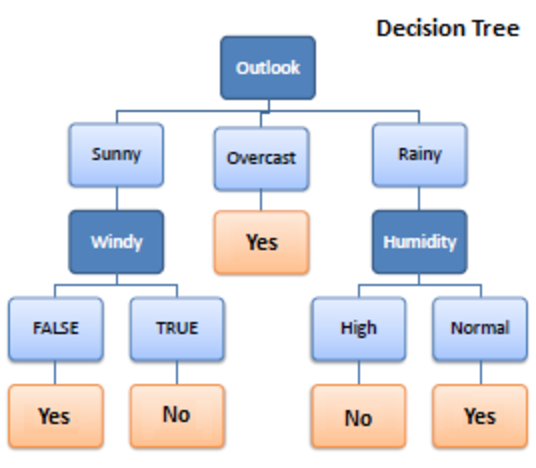

In [47]:
from IPython.display import Image
Image(filename='Pictures/Decision-Trees-modified-16.jpg')
